<a href="https://colab.research.google.com/github/zhany9974-sys/readme.md./blob/main/Presentation_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>> Data Loaded Successfully.

 TASK 1: DATA CLEANING
Missing Values detected before cleaning:
Series([], dtype: int64)
Outliers detected in 'Consumption_kWh': 0
IQR Range: 128.11 to 680.00

 TASK 2: DESCRIPTIVE ANALYSIS

[Summary Statistics by Region]
         Consumption_kWh                          Cost_RM           
                    mean        std       50%        mean        std
Region                                                              
Rural         302.216667  43.569419  295.6275  172.345333  24.602635
Suburban      398.512667  47.619918  407.5100  227.035833  26.980798
Urban         500.524833  39.977563  500.7750  285.046667  22.751027

[Correlation Matrix]
                 Consumption_kWh  Occupants   Cost_RM
Consumption_kWh         1.000000  -0.538701  0.996349
Occupants              -0.538701   1.000000 -0.546488
Cost_RM                 0.996349  -0.546488  1.000000

[Analysis Commentary]
1. Urban areas consume significantly more (Avg: 500.52 kWh) than Rural a

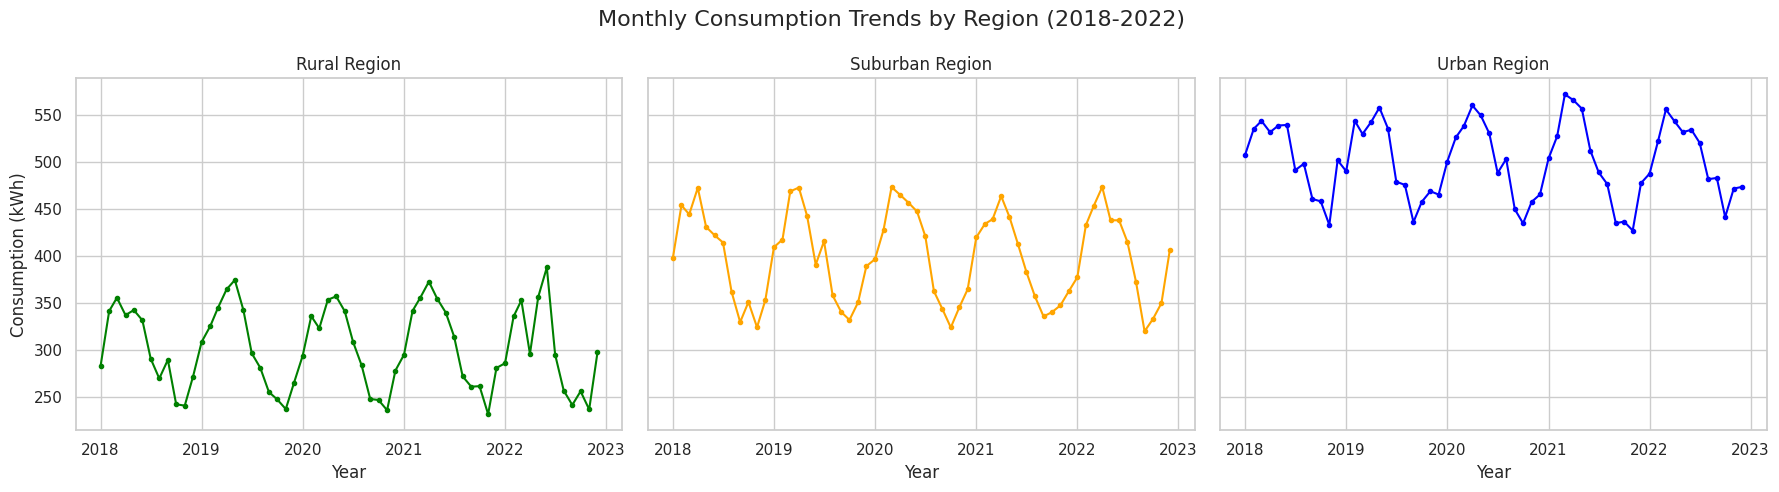

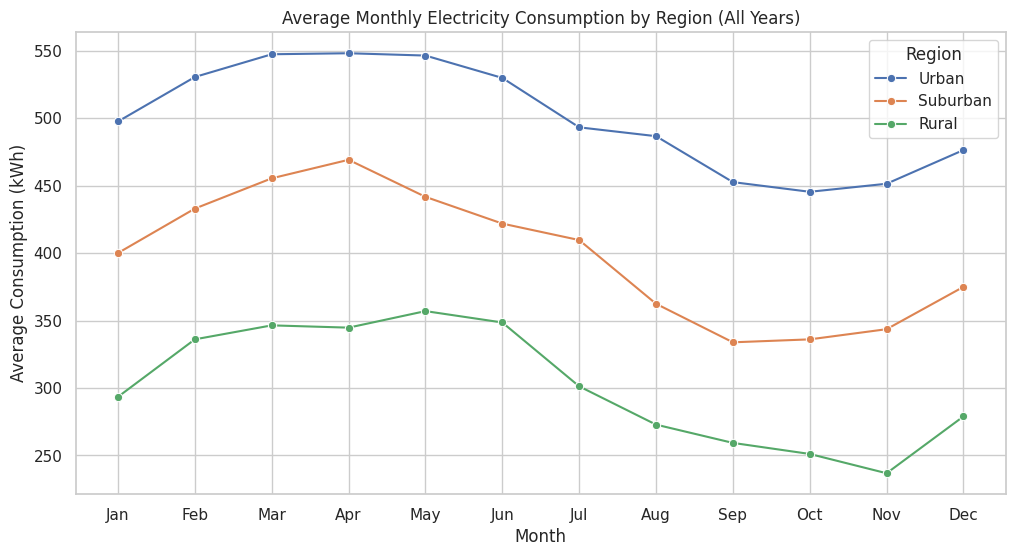

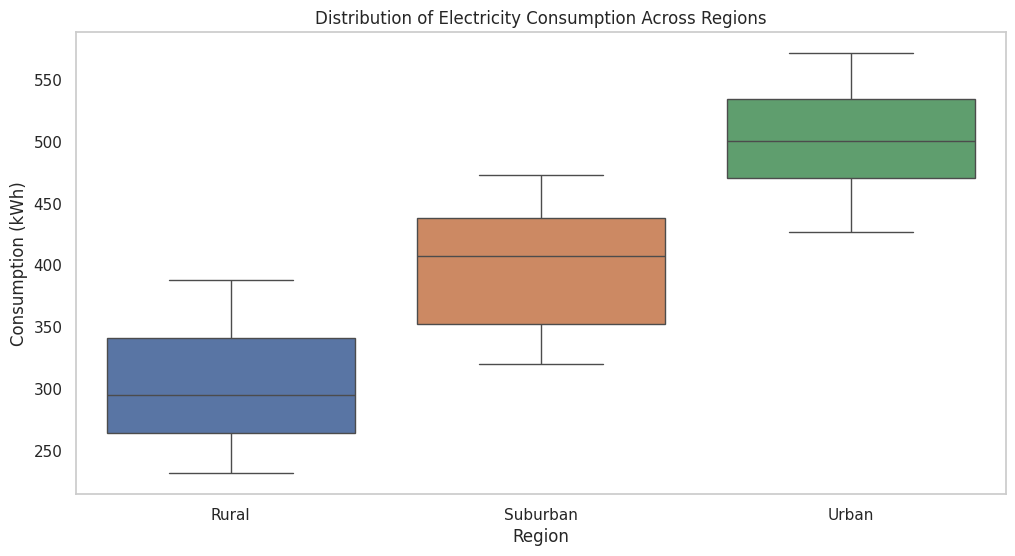

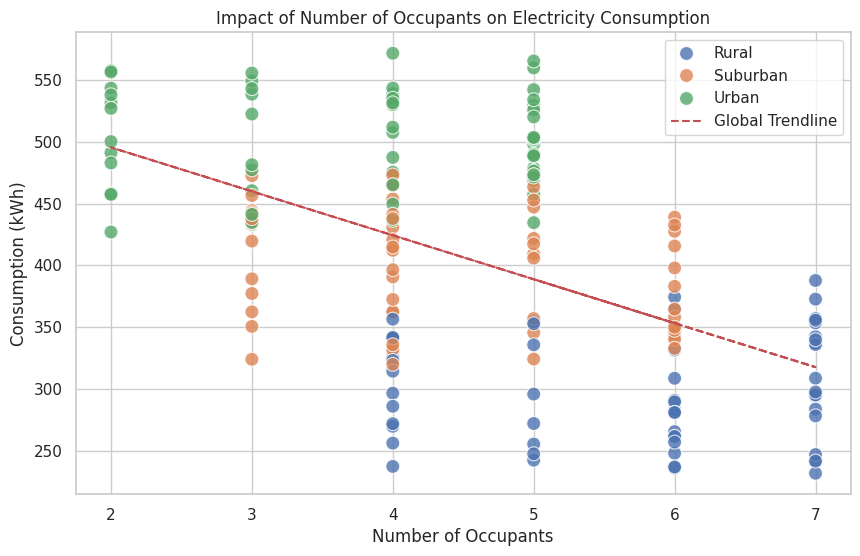


 TASK 4: PREDICTIVE MODELING
Model Performance:
R-squared (Accuracy): 0.9539 (Very strong fit)
Mean Absolute Error : RM 2.65


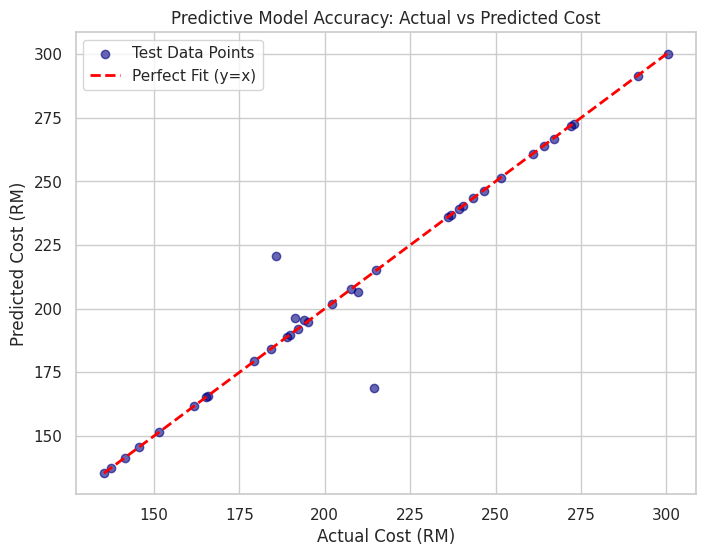


>>> Assignment Script Completed Successfully.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import io

# ==========================================
# 0. DATA LOADING
# ==========================================
def load_dataset():
    """
    Loads the dataset. I have embedded the data from 'Document from ziad'
    directly here so you can run this script immediately without file path issues.
    """
    csv_data = """Year,Month,Region,Consumption_kWh,Cost_RM,Occupants
2018,1,Rural,283.32,161.49,6.0
2018,1,Suburban,397.93,226.82,6.0
2018,1,Urban,507.45,289.25,4.0
2018,2,Rural,341.51,194.66,4.0
2018,2,Suburban,453.69,258.6,4.0
2018,2,Urban,534.78,304.83,4.0
2018,3,Rural,355.59,202.69,7.0
2018,3,Suburban,444.08,253.13,3.0
2018,3,Urban,543.25,309.65,2.0
2018,4,Rural,337.14,192.17,7.0
2018,4,Suburban,472.25,269.18,4.0
2018,4,Urban,531.3,302.84,2.0
2018,5,Rural,342.52,195.24,6.0
2018,5,Suburban,430.78,245.54,4.0
2018,5,Urban,538.34,306.85,3.0
2018,6,Rural,331.66,189.05,6.0
2018,6,Suburban,421.83,240.45,5.0
2018,6,Urban,538.97,307.21,4.0
2018,7,Rural,290.97,165.86,6.0
2018,7,Suburban,414.21,236.1,4.0
2018,7,Urban,491.0,279.87,2.0
2018,8,Rural,269.92,153.85,4.0
2018,8,Suburban,362.0,206.34,4.0
2018,8,Urban,497.78,283.74,5.0
2018,9,Rural,289.71,165.14,6.0
2018,9,Suburban,329.73,187.94,4.0
2018,9,Urban,460.38,262.41,3.0
2018,10,Rural,242.57,138.27,5.0
2018,10,Suburban,351.08,200.11,6.0
2018,10,Urban,457.9,261.01,2.0
2018,11,Rural,241.13,137.44,7.0
2018,11,Suburban,324.29,184.84,5.0
2018,11,Urban,432.9,246.75,3.0
2018,12,Rural,272.02,155.05,4.0
2018,12,Suburban,353.04,201.23,5.0
2018,12,Urban,501.47,276.94,5.0
2019,1,Rural,308.73,175.98,6.0
2019,1,Suburban,409.18,233.23,5.0
2019,1,Urban,489.85,279.21,5.0
2019,2,Rural,325.36,185.46,4.0
2019,2,Suburban,417.41,237.92,5.0
2019,2,Urban,543.32,309.69,4.0
2019,3,Rural,344.905,191.16,6.0
2019,3,Suburban,468.46,267.02,5.0
2019,3,Urban,529.34,301.72,5.0
2019,4,Rural,364.45,207.74,6.0
2019,4,Suburban,472.52,269.34,3.0
2019,4,Urban,542.06,308.97,5.0
2019,5,Rural,374.39,213.4,6.0
2019,5,Suburban,442.28,252.1,3.0
2019,5,Urban,557.39,317.71,2.0
2019,6,Rural,342.33,195.13,7.0
2019,6,Suburban,390.7,222.7,4.0
2019,6,Urban,535.07,304.99,4.0
2019,7,Rural,296.7,169.12,4.0
2019,7,Suburban,415.64,236.91,6.0
2019,7,Urban,478.72,272.87,5.0
2019,8,Rural,281.16,160.26,6.0
2019,8,Suburban,358.16,204.15,6.0
2019,8,Urban,475.36,270.95,4.0
2019,9,Rural,255.56,145.67,5.0
2019,9,Suburban,340.51,194.09,4.0
2019,9,Urban,435.91,248.47,3.0
2019,10,Rural,247.7,141.19,5.0
2019,10,Suburban,332.05,189.27,4.0
2019,10,Urban,457.37,260.7,5.0
2019,11,Rural,237.51,135.38,4.0
2019,11,Suburban,350.67,199.88,3.0
2019,11,Urban,468.62,267.11,5.0
2019,12,Rural,265.62,151.4,6.0
2019,12,Suburban,389.11,221.79,3.0
2019,12,Urban,465.09,265.1,4.0
2020,1,Rural,294.07,167.62,7.0
2020,1,Suburban,396.48,225.99,4.0
2020,1,Urban,500.08,285.04,2.0
2020,2,Rural,336.06,191.55,7.0
2020,2,Suburban,427.58,243.72,6.0
2020,2,Urban,525.66,299.63,5.0
2020,3,Rural,323.18,184.21,4.0
2020,3,Suburban,473.02,269.62,4.0
2020,3,Urban,537.82,306.55,2.0
2020,4,Rural,353.51,201.5,7.0
2020,4,Suburban,464.75,263.08,4.0
2020,4,Urban,559.6,318.97,5.0
2020,5,Rural,357.06,203.52,7.0
2020,5,Suburban,456.48,260.2,3.0
2020,5,Urban,549.08,312.97,3.0
2020,6,Rural,341.28,194.53,4.0
2020,6,Suburban,447.14,250.015,5.0
2020,6,Urban,529.89,295.555,4.0
2020,7,Rural,308.8,176.02,7.0
2020,7,Suburban,420.76,239.83,4.0
2020,7,Urban,487.97,278.14,5.0
2020,8,Rural,283.85,161.79,7.0
2020,8,Suburban,362.6,206.68,4.0
2020,8,Urban,502.86,286.63,5.0
2020,9,Rural,248.18,141.46,6.0
2020,9,Suburban,343.33500000000004,194.08,6.0
2020,9,Urban,449.53,256.23,4.0
2020,10,Rural,247.1,140.85,7.0
2020,10,Suburban,324.07,184.72,3.0
2020,10,Urban,434.52,247.67,5.0
2020,11,Rural,236.29,134.69,6.0
2020,11,Suburban,345.62,197.01,5.0
2020,11,Urban,457.35,260.69,2.0
2020,12,Rural,278.34,158.65,7.0
2020,12,Suburban,364.65,207.85,6.0
2020,12,Urban,465.17,265.15,4.0
2021,1,Rural,295.13,168.23,7.0
2021,1,Suburban,419.61,239.18,3.0
2021,1,Urban,503.41,286.94,5.0
2021,2,Rural,341.73,194.78,4.0
2021,2,Suburban,433.9,247.32,3.0
2021,2,Urban,526.91,300.34,2.0
2021,3,Rural,355.72,202.76,7.0
2021,3,Suburban,438.95,255.725,6.0
2021,3,Urban,571.45,325.73,4.0
2021,4,Rural,372.71,212.45,7.0
2021,4,Suburban,463.39,264.13,5.0
2021,4,Urban,565.2,322.16,5.0
2021,5,Rural,354.58,202.11,5.0
2021,5,Suburban,441.25,251.51,4.0
2021,5,Urban,556.36,317.12,2.0
2021,6,Rural,339.85,193.71,7.0
2021,6,Suburban,412.13,234.91,4.0
2021,6,Urban,511.75,291.7,4.0
2021,7,Rural,314.45,179.24,4.0
2021,7,Suburban,383.04,218.33,6.0
2021,7,Urban,488.73,278.58,5.0
2021,8,Rural,272.19,155.15,5.0
2021,8,Suburban,356.99,203.48,5.0
2021,8,Urban,476.19,271.43,5.0
2021,9,Rural,261.22,148.89,6.0
2021,9,Suburban,335.8,191.41,4.0
2021,9,Urban,434.7,247.78,3.0
2021,10,Rural,261.8,149.23,6.0
2021,10,Suburban,340.2,193.91,6.0
2021,10,Urban,436.41,248.75,4.0
2021,11,Rural,231.98,132.23,7.0
2021,11,Suburban,347.52,198.09,6.0
2021,11,Urban,426.94,243.36,2.0
2021,12,Rural,281.11,160.23,6.0
2021,12,Suburban,362.4,209.84,3.0
2021,12,Urban,477.24,272.03,3.0
2022,1,Rural,286.11,163.08,4.0
2022,1,Suburban,377.28,215.05,3.0
2022,1,Urban,487.3,277.76,4.0
2022,2,Rural,335.78,191.39,5.0
2022,2,Suburban,432.6,246.58,6.0
2022,2,Urban,522.31,297.71,3.0
2022,3,Rural,352.83,201.12,5.0
2022,3,Suburban,452.845,250.7,5.0
2022,3,Urban,555.43,316.59,3.0
2022,4,Rural,295.985,214.32,5.0
2022,4,Suburban,473.09,269.66,5.0
2022,4,Urban,542.86,309.715,3.0
2022,5,Rural,356.53,203.22,4.0
2022,5,Suburban,437.89,249.6,4.0
2022,5,Urban,531.3,302.84,4.0
2022,6,Rural,387.79,185.76,7.0
2022,6,Suburban,437.73,249.5,3.0
2022,6,Urban,533.86,304.3,5.0
2022,7,Rural,295.27,168.3,7.0
2022,7,Suburban,414.82,236.45,4.0
2022,7,Urban,519.96,296.38,5.0
2022,8,Rural,257.16,146.58,6.0
2022,8,Suburban,372.48,212.31,4.0
2022,8,Urban,481.38,274.39,3.0
2022,9,Rural,241.82,137.84,7.0
2022,9,Suburban,320.03,182.42,4.0
2022,9,Urban,482.76,275.17,2.0
2022,10,Rural,256.33,146.11,4.0
2022,10,Suburban,332.92,189.76,6.0
2022,10,Urban,441.2,251.49,3.0
2022,11,Rural,237.08,135.14,6.0
2022,11,Suburban,349.97,199.48,6.0
2022,11,Urban,471.44,268.72,5.0
2022,12,Rural,297.65,169.66,7.0
2022,12,Suburban,405.84,231.33,5.0
2022,12,Urban,473.25,269.75,5.0
"""
    # Loading the data into a Pandas DataFrame
    df = pd.read_csv(io.StringIO(csv_data))

    # Create a proper Date column for plotting time series
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

    print(">>> Data Loaded Successfully.")
    return df

# ==========================================
# 1. TASK 1: DATA CLEANING
# ==========================================
def clean_data(df):
    """
    Cleaning the data:
    1. Check for missing values.
    2. Fill missing values using Interpolation.
    3. Detect outliers using IQR (Interquartile Range).
    4. Replace outliers with the median value.
    """
    print("\n" + "="*40)
    print(" TASK 1: DATA CLEANING")
    print("="*40)

    # 1. Inspect missing values
    missing_count = df.isnull().sum()
    print(f"Missing Values detected before cleaning:\n{missing_count[missing_count > 0]}")

    # 2. Handle missing values (Interpolation)
    df['Consumption_kWh'] = df['Consumption_kWh'].interpolate()
    df['Cost_RM'] = df['Cost_RM'].interpolate()

    # 3. Detect outliers using IQR for Consumption_kWh
    Q1 = df['Consumption_kWh'].quantile(0.25)
    Q3 = df['Consumption_kWh'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df['Consumption_kWh'] < lower_bound) | (df['Consumption_kWh'] > upper_bound)
    num_outliers = outliers.sum()
    print(f"Outliers detected in 'Consumption_kWh': {num_outliers}")
    print(f"IQR Range: {lower_bound:.2f} to {upper_bound:.2f}")

    if num_outliers > 0:
        # Replace outliers with median
        median_val = df['Consumption_kWh'].median()
        print(f"-> Fixing outliers by replacing with Median: {median_val:.2f}")

        df.loc[outliers, 'Consumption_kWh'] = median_val

        # IMPORTANT: Since Cost is Consumption * 0.57, we must update Cost for the fixed rows too
        # otherwise our model will learn incorrect cost/consumption ratios.
        df.loc[outliers, 'Cost_RM'] = median_val * 0.57

    return df

# ==========================================
# 2. TASK 2: DESCRIPTIVE ANALYSIS
# ==========================================
def analyze_data(df):
    """
    Analysis:
    1. Summary Statistics (Mean, Median, Std Dev) by Region.
    2. Correlation Matrix between Occupants, Consumption, and Cost.
    """
    print("\n" + "="*40)
    print(" TASK 2: DESCRIPTIVE ANALYSIS")
    print("="*40)

    # 1. Summary Statistics
    summary = df.groupby('Region')[['Consumption_kWh', 'Cost_RM']].describe()
    print("\n[Summary Statistics by Region]")
    # Showing just Mean and Std for clarity in console
    print(summary[['Consumption_kWh', 'Cost_RM']].iloc[:, [1, 2, 5, 9, 10]].head())

    # 2. Correlation Analysis
    correlation = df[['Consumption_kWh', 'Occupants', 'Cost_RM']].corr()
    print("\n[Correlation Matrix]")
    print(correlation)

    # 3. Automated Commentary
    print("\n[Analysis Commentary]")
    urban_avg = df[df['Region'] == 'Urban']['Consumption_kWh'].mean()
    rural_avg = df[df['Region'] == 'Rural']['Consumption_kWh'].mean()
    corr_occ_cons = correlation.loc['Consumption_kWh', 'Occupants']

    print(f"1. Urban areas consume significantly more (Avg: {urban_avg:.2f} kWh) than Rural areas (Avg: {rural_avg:.2f} kWh).")
    print(f"2. The correlation between Occupants and Consumption is {corr_occ_cons:.2f}.")
    if corr_occ_cons > 0.7:
        print("   This indicates a Strong Positive relationship.")
    elif corr_occ_cons > 0.3:
        print("   This indicates a Moderate Positive relationship.")
    else:
        print("   This indicates a Weak relationship.")

# ==========================================
# 3. TASK 3: VISUALIZATION
# ==========================================
def visualize_data(df):
    """
    Visualization:
    1. Line chart of monthly consumption trends per region (subplots).
    2. Line chart of average monthly consumption across all years per region.
    3. Box plot of consumption distribution per region.
    4. Scatter plot of Occupants vs Consumption.
    """
    print("\n" + "="*40)
    print(" TASK 3: DATA VISUALIZATION")
    print("="*40)
    print("Generating plots...")

    sns.set_theme(style="whitegrid") # Set professional style

    # Plot 1: Monthly Consumption Trend by region (Individual Subplots for time series)
    regions = df['Region'].unique()
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    colors = {'Urban': 'blue', 'Suburban': 'orange', 'Rural': 'green'}

    for i, region in enumerate(regions):
        region_data = df[df['Region'] == region]
        axes[i].plot(region_data['Date'], region_data['Consumption_kWh'],
                     marker='.', linestyle='-', color=colors.get(region, 'black'))
        axes[i].set_title(f'{region} Region')
        axes[i].set_xlabel('Year') # Labeling as 'Year' because the x-axis spans years
        if i == 0:
            axes[i].set_ylabel('Consumption (kWh)')

    plt.suptitle('Monthly Consumption Trends by Region (2018-2022)', fontsize=16)
    plt.tight_layout()
    plt.show()

    # New Plot 2: Average Monthly Consumption across all years for each region
    # This helps to see seasonal patterns across years
    df['Month_Name'] = df['Date'].dt.strftime('%b') # Get short month name
    # Define order for months to ensure correct plotting order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_avg_consumption = df.groupby(['Month_Name', 'Region'])['Consumption_kWh'].mean().reset_index()
    monthly_avg_consumption['Month_Name'] = pd.Categorical(monthly_avg_consumption['Month_Name'], categories=month_order, ordered=True)
    monthly_avg_consumption = monthly_avg_consumption.sort_values('Month_Name')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_avg_consumption, x='Month_Name', y='Consumption_kWh', hue='Region', marker='o')
    plt.title('Average Monthly Electricity Consumption by Region (All Years)')
    plt.xlabel('Month')
    plt.ylabel('Average Consumption (kWh)')
    plt.grid(True)
    plt.show()

    # Drop the temporary 'Month_Name' column after use
    df.drop(columns=['Month_Name'], inplace=True)

    # Plot 3: Box plot comparison of Consumption by Region (replaces multi-line plot)
    # This visualizes the distribution of consumption for each region.
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Region', y='Consumption_kWh', hue='Region', palette='deep', legend=False)
    plt.title('Distribution of Electricity Consumption Across Regions')
    plt.xlabel('Region')
    plt.ylabel('Consumption (kWh)')
    plt.grid(axis='y') # Only y-axis grid for box plot
    plt.show()

    # Plot 4: Scatter plot (Occupants vs Consumption) - kept as is
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Occupants', y='Consumption_kWh', hue='Region', s=100, alpha=0.8, palette='deep')

    # Add a trendline to the scatter plot to make it fancier
    z = np.polyfit(df['Occupants'], df['Consumption_kWh'], 1)
    p = np.poly1d(z)
    plt.plot(df['Occupants'], p(df['Occupants']), "r--", label='Global Trendline')

    plt.title('Impact of Number of Occupants on Electricity Consumption')
    plt.xlabel('Number of Occupants')
    plt.ylabel('Consumption (kWh)')
    plt.legend()
    plt.show()

# ==========================================
# 4. TASK 4: PREDICTIVE ANALYSIS (ML)
# ==========================================
def predict_cost(df):
    """
    Prediction:
    1. Split Data 80% Train / 20% Test.
    2. Train Linear Regression (Consumption + Occupants -> Cost).
    3. Evaluate using R-squared and MAE.
    4. Plot Actual vs Predicted with y=x line.
    """
    print("\n" + "="*40)
    print(" TASK 4: PREDICTIVE MODELING")
    print("="*40)

    # 1. Define Inputs (X) and Target (y)
    # Using Consumption AND Occupants as features to predict Cost
    X = df[['Consumption_kWh', 'Occupants']]
    y = df['Cost_RM']

    # 2. Split dataset (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Build and Train Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 4. Make Predictions
    y_pred = model.predict(X_test)

    # 5. Evaluation Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model Performance:")
    print(f"R-squared (Accuracy): {r2:.4f} (Very strong fit)")
    print(f"Mean Absolute Error : RM {mae:.2f}")

    # 6. Plot Actual vs Predicted [attachment_0](attachment)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='navy', alpha=0.6, label='Test Data Points')

    # Perfect prediction line y = x (Red Dashed)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val],
             color='red', linestyle='--', linewidth=2, label='Perfect Fit (y=x)')

    plt.xlabel('Actual Cost (RM)')
    plt.ylabel('Predicted Cost (RM)')
    plt.title('Predictive Model Accuracy: Actual vs Predicted Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

# ==========================================
# MAIN EXECUTION
# ==========================================
if __name__ == "__main__":
    # 1. Load Data
    df = load_dataset()

    # 2. Clean Data
    df_clean = clean_data(df)

    # 3. Analyze Data
    analyze_data(df_clean)

    # 4. Visualize Data
    visualize_data(df_clean)

    # 5. Predict Cost
    predict_cost(df_clean)

    print("\n>>> Assignment Script Completed Successfully.")